# K-means clustering

It is one of the simplest and widely used **unsupervised learning** algorithms to solve clustering problems. The procedure follows a simple and easy way to classify a given data set through a certain number of clusters that you have set before you run the algorithm.  
The k-means algorithm will:
1. find the **nearest cluster center** for each data point and assign the data point closest to that cluster.
2. Once all data points have been assigned to clusters, the **cluster centers will be recomputed**.

In other words, new cluster centers will emerge from the average of the values of the cluster data points. This process is repeated until most data points stick to the same cluster. The cluster membership should stabilize.

## Loading data from csv file


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster

faithful = pd.read_csv('faithful.csv')
faithful.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


## Show the data
Consider the length of the eruption as x-axis and the time between eruptions as y-axis.

Text(0,0.5,u'Time between eruptions (minutes)')

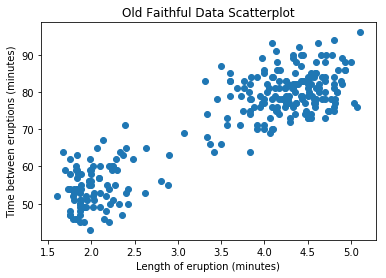

In [7]:
faithful.columns = ['eruptions', 'waiting']

plt.scatter(faithful.eruptions, faithful.waiting)
plt.title('Old Faithful Data Scatterplot')
plt.xlabel('Length of eruption (minutes)')
plt.ylabel('Time between eruptions (minutes)')

## Apply K-Means
Fix the number of desired clusters and iteratively determine the labels and the centroids until convergence.

In [8]:
faith = np.array(faithful)

k = 2
kmeans = cluster.KMeans(n_clusters=k, init='random')
kmeans.fit(faith)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

or, alternatively, determine k with the "elbow method"

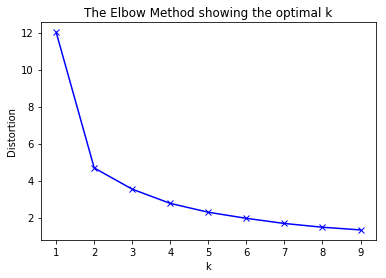

In [9]:
from scipy.spatial.distance import cdist
distortions = []
K = range(1,10)

for ki in K:
    kmeanModel = cluster.KMeans(n_clusters=ki, init='random')
    kmeanModel.fit(faith)
    distortions.append(sum(np.min(cdist(faith, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / faith.shape[0])
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## Show results
Plot the original data and the determined centroid assigning a color to each of the clusters.

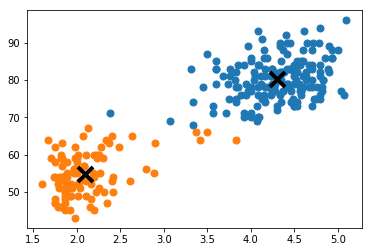

In [10]:
for i in range(k):
    # select only data observations with cluster label == i
    ds = faith[np.where(labels==i)]
    # plot the data observations
    plt.plot(ds[:,0],ds[:,1],'o', markersize=7)
    # plot the centroids
    lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
    # make the centroid x's bigger
    plt.setp(lines,ms=15.0)
    plt.setp(lines,mew=4.0)
plt.show()